This example shows how dummy cores will expand into new cores in the output.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition

/Users/kellebr5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.


In [2]:
from rdkit.Chem import PandasTools

In [3]:
import pandas as pd
from rdkit.Chem import PandasTools

In [4]:
core = Chem.MolFromSmarts("*1****1-*2***2")

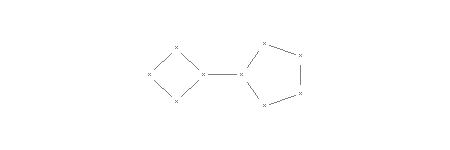

In [5]:
core

In [6]:
smiles = ["C1CCCC1-C2CCC2Cl", "N1CCCC1-C2CCC2Cl", "O1CCCC1-C2CCC2Cl", "N1OCCC1-C2CCC2Cl", "N1OCSC1-C2CCC2Cl"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

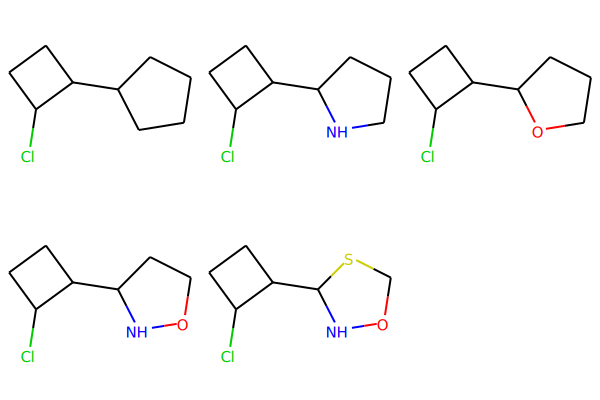

In [7]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

Make the RGroup decomposition!

In [8]:
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)

In [9]:
for i,m in enumerate(mols):
    rgroups.Add(m)
    if i == 10:
        break

To finalize the rgroups, we need to call process after all molecules are added.

In [10]:
rgroups.Process()

True

In [11]:
groups = rgroups.GetRGroupsAsColumns()
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)

The dummy cores are expanding into the cores found during the decomposition.

,Core,R1,R2,R3,R4
0,,,,,
1,,,,,
2,,,,,
3,,,,None,
4,,,None,None,None

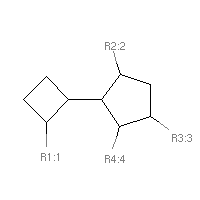
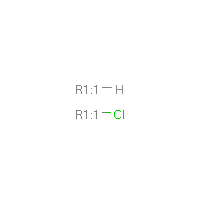
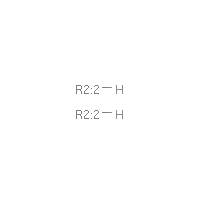
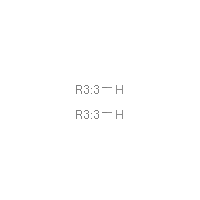
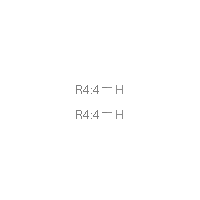
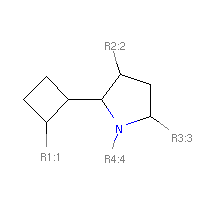
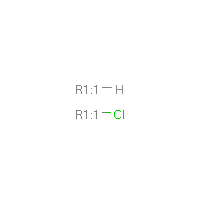
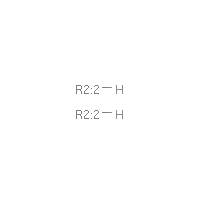
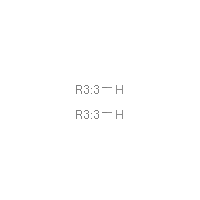
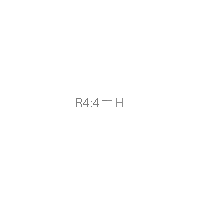
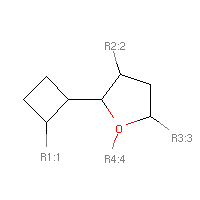
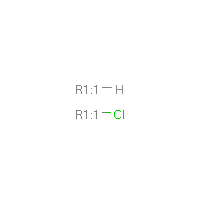
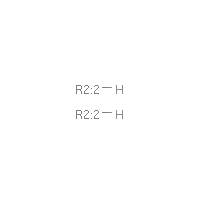
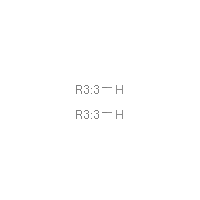
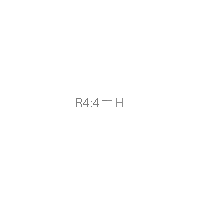
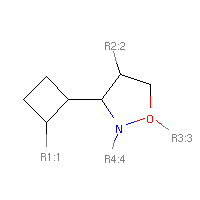
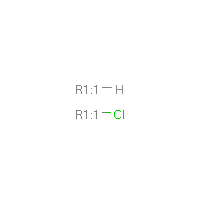
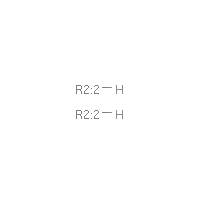
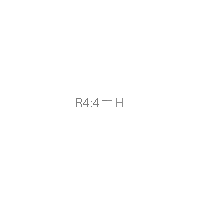
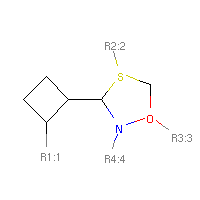
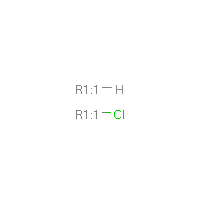

In [12]:
frame